# Decision Tree on Imbalanced Dataset
Imbalanced Dataset is a very common problem in data science. It is a condition where classes are not represented equally or in other words, it is a condition where one class has more instances than the others. This condition can cause several problems such as the model cannot classify the minority class, you cannot use accuracy as the performance metrics, etc.

# The Dataset
The dataset used in this experiment is the Chinese Fall Detection I downloaded from Kaggle. The objective of this experiment is to classify humans' activities -  0 : Standing, 1: Walking, 2:Sitting, 3:Falling, 4:Cramps dan 5:Running<br> 
The following is the steps conducted in this project<br>
1 Import Libraries <br>
2 Read Dataset<br>
3 Data Preview <br>
4 Data Visualization<br>
5 Preprocessing (Train - Test Split, Oversampling, Undersampling)<br>
6 Decision Tree Model<br>
7 Evaluation<br>

In [1]:
#Import Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import statistics as stat
from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
# Modules used for assessing the performance of the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


# Performance Report

In [67]:
#Performance Report
def generateClassificationReport(y_test,y_pred):
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))    
    print('accuracy is ',accuracy_score(y_test,y_pred))

# Read Data and Data Preview
1. Data Shape
2. Data Head and Tail
3. Data Basic Informations
4. Data Stats
5. Null Value
6. Features List
7. Class Distribution
8. Correlation

In [68]:
"""Generate a raw data preview report"""
import pandas as pd
file_path = 'falldetection.csv'
data = pd.read_csv(file_path)
def preview(data,class_name): #transfer into file_path and the data's class/label name (in this case, class name is ACTIVITY)  

    """1.show data shape"""
    data_shape = data.shape
    print("1..data shape:", data_shape)
    print("*******"*20)
    #
    """2.show first 10 rows and last 10 rows of data"""
    head_10 = data.head(10)
    print("2.First 10 rows:")
    print(head_10)
    print("*******"*20)
    print("3.Last 10 rows:")
    tail_10 = data.tail(10)
    print(tail_10)
    print("*******"*20)

    """3.show basic information of the raw data"""
    print("4.Basic information of the raw data:")
    data_info = data.info()
    print(data_info)
    print("*******"*20)

    """4.Show more detailed information of the data..."""
    data_describe = data.describe(include = "all")
    print("5.Detailed information of the raw data:")
    print(data_describe)
    print("*******"*20)

    """5.Examine null"""
    print("6.Situation of null value of raw data:")
    data_null = data.isnull().sum()
    print(data_null)
    print("*******" * 20)

    """6.Gain feature name(column name) list"""
    print("7.feature_name_list：")
    features_list = data.columns.values.tolist()
    print(features_list)
    print("*******" * 20)

    """7.Gain the distribution of class value"""
    print("7.Distribution of class_value {}:".format(repr(class_name)))
    class_values_distribution = data[class_name].value_counts()
    print(class_values_distribution)
    
    """8 Data Correlation of Each Feature"""
    print('8. Feature Correlation from One Another')
    print(data.corr())
#use function 'preview'
preview(data,'ACTIVITY')

1..data shape: (16382, 7)
********************************************************************************************************************************************
2.First 10 rows:
   ACTIVITY      TIME         SL      EEG  BP   HR  CIRCLUATION
0         3   4722.92    4019.64 -1600.00  13   79          317
1         2   4059.12    2191.03 -1146.08  20   54          165
2         2   4773.56    2787.99 -1263.38  46   67          224
3         4   8271.27    9545.98 -2848.93  26  138          554
4         4   7102.16   14148.80 -2381.15  85  120          809
5         5   7015.24    7336.79 -1699.80  22   95          427
6         3   8620.28   24949.90 -3198.06  35  157         1519
7         3   9238.73   39245.50 -2590.00  15  196         1885
8         0  12276.40   59742.00 -5101.00  56  249         2826
9         4  14165.50  140950.00 -1410.00  82  315         5844
****************************************************************************************************************

There is no missing value in the dataset but the data distribution in each class is highly imbalanced.

# Preprocessing
In this first attempt, we try to fit the data into the model without any preprocessing step exept for Train - Test Split

In [69]:
#Split into Training and Test Data
X = data.drop(columns=['ACTIVITY']) #<<Training Data
y = data['ACTIVITY'].values #<<Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Decision Tree
The following code is to fit the data into the model, predict with the test data and finally calculating the accuracy

In [70]:
#Fitting Model, Predict, Evaluation
model = DecisionTreeClassifier()
acc1 = []
model.fit(X_train, y_train)
target_pred = model.predict(X_test)
generateClassificationReport(y_test,target_pred)
acc1.append(accuracy_score(y_test,target_pred))

print("\n Accuracy: ",stat.mean(acc1))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1407
           1       0.71      0.73      0.72       147
           2       0.67      0.71      0.69       767
           3       0.61      0.60      0.61      1051
           4       0.56      0.60      0.58      1037
           5       0.54      0.56      0.55       506

    accuracy                           0.69      4915
   macro avg       0.67      0.68      0.67      4915
weighted avg       0.70      0.69      0.69      4915

[[1188    1   29   59   84   46]
 [   0  108   33    2    3    1]
 [  14   37  546  117   45    8]
 [  24    4  144  633  212   34]
 [  36    2   46  180  622  151]
 [  18    0   12   42  150  284]]
accuracy is  0.6878942014242116

 Accuracy:  0.6878942014242116


# Over Sampling
Oversampling is resampling the minority class so that it equals to the majority class. I use SMOTE method to oversampling the data.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#Apply Over Sampling
print('Before Oversampling')
print(sorted(Counter(y_train).items()))
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
print('After Oversampling')
print(sorted(Counter(y_train).items()))
#Standard Scaler
#scaler = StandardScaler()  
#scaler.fit(X_train)  
#X_train = scaler.transform(X_train)  
#X_test = scaler.transform(X_test)  

Before Oversampling
[(0, 3202), (1, 348), (2, 1734), (3, 2553), (4, 2434), (5, 1196)]
After Oversampling
[(0, 3202), (1, 3202), (2, 3202), (3, 3202), (4, 3202), (5, 3202)]


# Fitting Model

In [72]:
#Fitting Model, Prediksi, dan Evaluasi
model = DecisionTreeClassifier()
acc = []
model.fit(X_train, y_train)
target_pred = model.predict(X_test)
generateClassificationReport(y_test,target_pred)
acc.append(accuracy_score(y_test,target_pred))

print("\n Accuracy: ",stat.mean(acc))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1406
           1       0.64      0.81      0.71       154
           2       0.66      0.67      0.66       768
           3       0.61      0.60      0.60      1035
           4       0.59      0.58      0.58      1060
           5       0.51      0.63      0.57       492

    accuracy                           0.68      4915
   macro avg       0.66      0.69      0.67      4915
weighted avg       0.69      0.68      0.69      4915

[[1175    9   23   46   77   76]
 [   2  124   22    3    2    1]
 [  11   49  511  137   47   13]
 [  28    3  152  616  198   38]
 [  24    7   55  187  618  169]
 [  23    1   17   28  112  311]]
accuracy is  0.6826042726347915

 Accuracy:  0.6826042726347915


# Under Sampling
Undersampling is resampling the majority class so that it equals to the minority class. By using the Random Under Sampler, the data is cut randomly.

In [73]:
from imblearn.under_sampling import RandomUnderSampler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#Apply Random Under Sampling
rus = RandomUnderSampler(random_state=0)
X_train, y_train =rus.fit_resample(X_train, y_train)

In [74]:
#Fitting Model, Prediksi, dan Evaluasi
model = DecisionTreeClassifier()
acc2 = []
model.fit(X_train, y_train)
target_pred = model.predict(X_test)
generateClassificationReport(y_test,target_pred)
acc2.append(accuracy_score(y_test,target_pred))

print("\n Accuracy: ",stat.mean(acc2))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72      1393
           1       0.53      0.79      0.63       153
           2       0.53      0.60      0.56       725
           3       0.53      0.49      0.51      1066
           4       0.46      0.45      0.46      1049
           5       0.41      0.59      0.48       529

    accuracy                           0.56      4915
   macro avg       0.55      0.59      0.56      4915
weighted avg       0.58      0.56      0.57      4915

[[889  11  66 109 169 149]
 [  2 121  17   7   3   3]
 [ 25  86 437 100  51  26]
 [ 68   5 181 521 219  72]
 [ 66   4 102 197 474 206]
 [ 39   3  19  44 111 313]]
accuracy is  0.560528992878942

 Accuracy:  0.560528992878942


# Discussion
No preprocessing and Oversampling showed almost the same performance (with only 0,01% difference) which tell us that imbalanced dataset does not affect Decision Tree’s performance. This proves the theory that Decision Tree works well with imbalanced data. On the other side, the Undersampling technique obtained a noticeably lower accuracy. This may be caused by the reducing number of datasets after undersampling was performed. Random Over Sampling means that it will randomly remove any data so that each class has the same number of data as the minority class (in this case, Class ‘1’ with 502 rows). Random Over Sampling is an easy method but we may lose important data.

0.6878942014242116
0.6826042726347915
0.560528992878942


<BarContainer object of 3 artists>

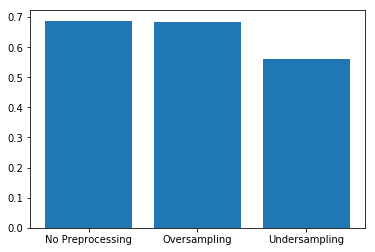

In [75]:
import matplotlib.pyplot as plt
print(stat.mean(acc1))
print(stat.mean(acc))
print(stat.mean(acc2))

data = {'No Preprocessing': stat.mean(acc1), 'Oversampling': stat.mean(acc), 'Undersampling': stat.mean(acc2)}
names = list(data.keys())
values = list(data.values())

#fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
plt.bar(names, values)

Dataset can be downloaded on: https://www.kaggle.com/pitasr/falldata <br>
Don't forget to cite the author:<br>
Özdemir, Ahmet Turan, and Billur Barshan. “Detecting Falls with Wearable Sensors Using Machine Learning Techniques.” Sensors (Basel, Switzerland) 14.6 (2014): 10691–10708. PMC. Web. 23 Apr. 2017.